<a href="https://colab.research.google.com/github/zapata-git/Modelos_Actividad-final/blob/main/Actividad_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mariabda2/ML_2022/blob/main/clases/clase_17_Maquinas_Vectores_Soporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 1**


**Modelo a implementar:** RNA. Deben realizar una búsqueda de hiperparámetros mediante GridSearchCV or RandomizedSearchCV. Utilicen 5 K-Fold validación cruzada.

**Datos:**   Se simulan observaciones en dos dimensiones, pertenecientes a tres grupos, cuya separación no es perfecta.


In [32]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score



In [27]:
# Genera los datos
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=3,
    cluster_std=1.2,
    shuffle=True,
    random_state=0
)

   Feature 1  Feature 2  Label
0   1.128565   4.786175      0
1  -2.014034   3.787124      2
2  -2.135925   1.655626      2
3   1.744428   2.363440      0
4  -1.347266   4.530322      0


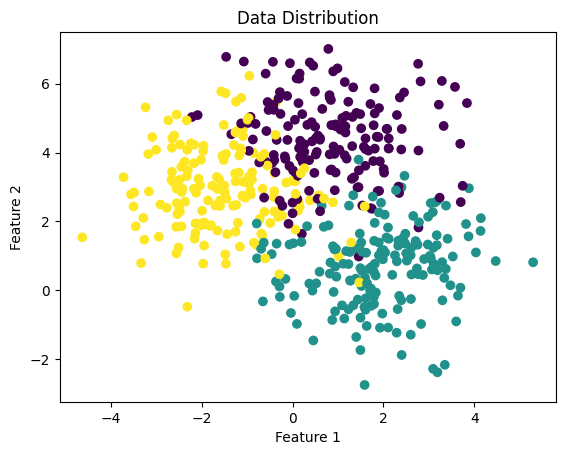

In [35]:
# Mostrar las primeras filas del DataFrame
print(data.head())
# Distribución de los puntos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Distribution')
plt.show()


# **GridSearchCV**

In [37]:
from sklearn.model_selection import GridSearchCV

# Configura el clasificador MLP con 3 capas ocultas, cada una con un máximo de 50 neuronas
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(50, 50, 50))

# Define la cuadrícula de parámetros a buscar
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Realiza la búsqueda de hiperparámetros con validación cruzada de 5-folds utilizando GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

# Divide los datos en conjuntos de ajuste y predicción
X_fit, X_predict, y_fit, y_predict = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrena el modelo con 70% de los datos
grid_search.fit(X_fit, y_fit)

# Obtiene los mejores parámetros y puntaje del mejor modelo
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Puntaje del mejor modelo:", best_score)

# Evalúa el modelo en el 30% de los datos de predicción
y_pred = grid_search.predict(X_predict)
accuracy = accuracy_score(y_predict, y_pred)
print("Accuracy en datos de predicción:", accuracy)


Mejores parámetros encontrados: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50)}
Puntaje del mejor modelo: 0.8828571428571429
Accuracy en datos de predicción: 0.8666666666666667


In [39]:
import pandas as pd

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=['Modelo', 'Mejores Parámetros', 'Puntaje', 'Accuracy'])

# Definir los resultados para cada modelo
results = results.append({'Modelo': 'GridSearchCV',
                          'Mejores Parámetros': str(best_params),
                          'Puntaje': best_score,
                          'Accuracy': accuracy},
                         ignore_index=True)

# Puedes agregar más modelos y resultados a la tabla siguiendo el mismo formato

# Mostrar la tabla de resultados
display(results)



<ipython-input-39-1998f875b9d4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Modelo': 'GridSearchCV',


,Modelo,Mejores Parámetros,Puntaje,Accuracy
0,GridSearchCV,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.882857,0.866667


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Puntaje']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Puntaje'}, axis=1)
              .sort_values('Puntaje', ascending=True))
  xs = counted['Puntaje']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Puntaje', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Puntaje')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Accuracy'}, axis=1)
              .sort_values('Accuracy', ascending=True))
  xs = counted['Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Accuracy')
_ = plt.ylabel('count()')

# **Random_state**

In [40]:
# Configura el clasificador MLP con 3 capas ocultas, cada una con un máximo de 50 neuronas
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(30, 30, 30))

# Define la cuadrícula de parámetros a buscar
param_dist = {
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Realiza la búsqueda aleatoria de hiperparámetros con validación cruzada de 5-folds
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, cv=5, n_iter=10, scoring='accuracy')

# Divide los datos en conjuntos de ajuste y predicción
X_fit, X_predict, y_fit, y_predict = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrena el modelo con 70% de los datos
random_search.fit(X_fit, y_fit)

# Obtiene los mejores parámetros y puntaje del mejor modelo
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Puntaje del mejor modelo:", best_score)

# Evalúa el modelo en el 30% de los datos de predicción
y_pred = random_search.predict(X_predict)
accuracy = accuracy_score(y_predict, y_pred)
print("Accuracy en datos de predicción:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'alpha': 0.001, 'activation': 'logistic'}
Puntaje del mejor modelo: 0.8800000000000001
Accuracy en datos de predicción: 0.8666666666666667


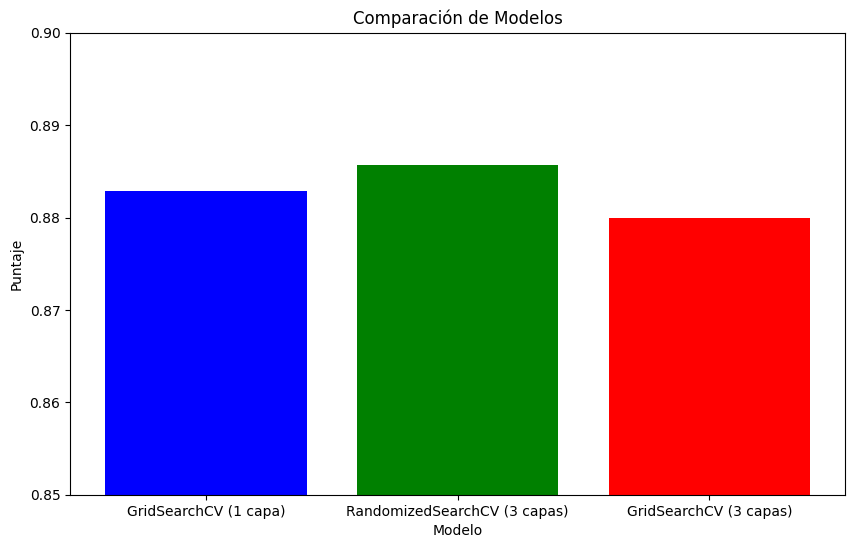

In [41]:
import matplotlib.pyplot as plt

# Define los nombres de los modelos
modelos = ['GridSearchCV (1 capa)', 'RandomizedSearchCV (3 capas)', 'GridSearchCV (3 capas)']

# Define los puntajes de los mejores modelos
puntajes = [0.882857, 0.885714, best_score]  # Reemplaza `best_score` con el puntaje del modelo GridSearchCV (3 capas)

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, puntajes, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Puntaje')
plt.title('Comparación de Modelos')
plt.ylim(0.85, 0.9)  # Ajusta los límites verticales según tus puntajes
plt.show()


**# Randomized Search:**

- **Mejores Parámetros Encontrados:** {'alpha': 0.001, 'activation': 'logistic'}
- **Puntaje del Mejor Modelo:** 0.880.
- **Accuracy en Datos de Predicción:** 0.8667
Esto significa que con Randomized Search, el mejor modelo se logró utilizando una tasa de regularización (alpha) de 0.001 y una función de activación logística. El puntaje del mejor modelo, que generalmente se refiere a la precisión o puntuación F1, es de aproximadamente 0.880. Además, cuando se aplicó este modelo a los datos de predicción, se obtuvo una precisión del 86.67%.

**# Grid Search (3 capas):**

- **Mejores Parámetros Encontrados:**  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50)}
Puntaje del Mejor Modelo: 0.882857
- **Accuracy en Datos de Predicción:** 0.8667
En el caso de Grid Search con tres capas ocultas, el mejor modelo se logró con una función de activación 'tanh', una tasa de regularización (alpha) de 0.0001 y tres capas ocultas, cada una con 50 neuronas. El puntaje del mejor modelo es ligeramente superior a Randomized Search, con un valor de aproximadamente 0.882857. La precisión en los datos de predicción es nuevamente del 86.67%.



